In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from pandas import DataFrame

sns.set()
sns.set_context("paper")
sns.set_style("whitegrid")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42



In [2]:
appFilename = "../../results_aggr/app_bootstrap_influx.csv"
microSummary = "../../results_all/micro_bootstrapping_influx_opti/summaryInflux.csv"
microAllSummary = "../../results_all/micro_bootstrapping_influx/summaryInflux.csv"


figure = "appAndMicroHistoryInflux.pdf"
figure2 = "appAndMicroFullHistoryInflux.pdf"


In [3]:
df_values = pd.read_csv(appFilename, names=["commit", "type", "CI_min", "Median", "CI_max", "jump", "trend"], skiprows=1)
df_values.sort_values(by=["commit"], inplace=True)

df_changes = pd.read_csv(microSummary, sep=";")

Plotting type inserts
Style is -
Plotting type group-by queries
Style is (0, (3, 6))
Plotting type simple queries
Style is --


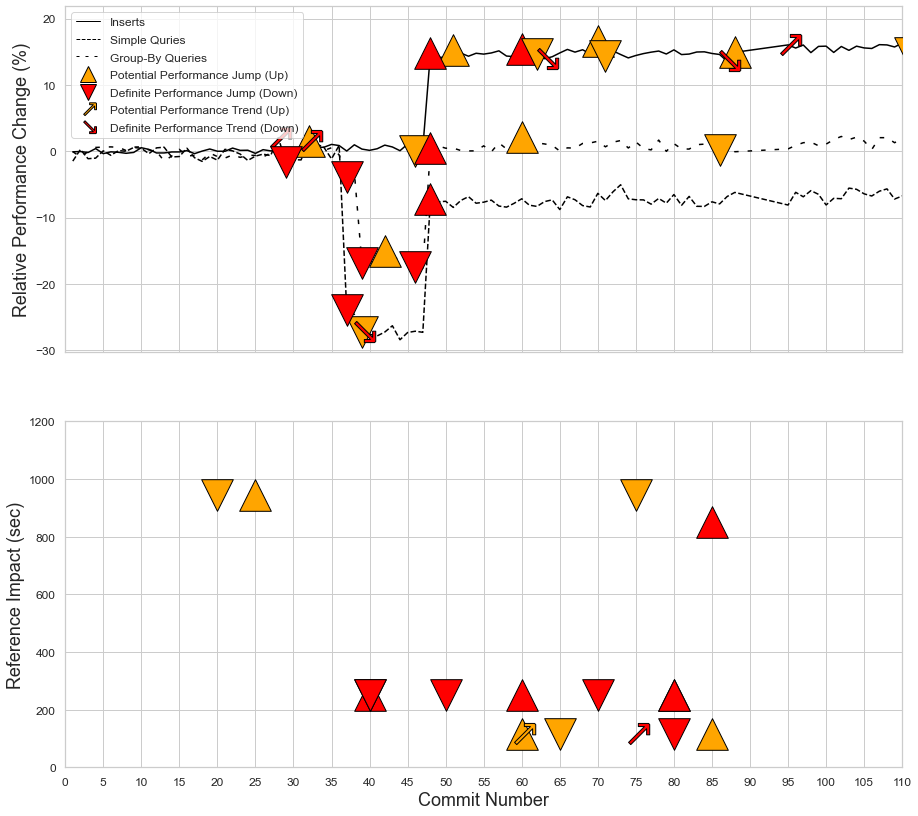

In [4]:
#Find % set y-limits
min = -5
max = 5
for minSmall in df_values.CI_min.unique():
    if minSmall < min:
        min = minSmall

for maxSmall in df_values.CI_max.unique():
    if maxSmall > max:
        max = maxSmall


sns.set(style="whitegrid")
#axes = plt.axes()

uptrendMarker="$↗$"
downtrendMarker="$↘$"
jumpSize=1000
trendSize=700
fillColor="#bac7e6"
edgeColor='black'
mySpecialStyle=(0, (3, 6))
linestyles=["-", mySpecialStyle, "--"]

plot, axes = plt.subplots(2,1,figsize=(15,14), sharex=True)
axes[0].set_ylim([min, max])
axes[0].set_xlim([0, 110])
axes[0].set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110])
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)

i=0
for type in df_values.type.unique():
    print(f"Plotting type {type}")

    measurements = df_values.loc[(df_values['type'].str.startswith(type, na=False))]

    print(f"Style is {linestyles[i]}")
    #Plot Median line
    sns.lineplot(ax=axes[0], data=measurements, x="commit", y="Median", color="black", linestyle=linestyles[i])
    i += 1

    #Plot detected ups and downs as well
    ups = measurements.loc[(measurements['jump'].astype(str).str.startswith("potential up", na=False))]
    plot = sns.regplot(ax=axes[0], data=ups,x="commit", y="Median", marker="^", fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})
    ups = measurements.loc[(measurements['jump'].astype(str).str.startswith("definite up", na=False))]
    plot = sns.regplot(ax=axes[0], data=ups,x="commit", y="Median", marker="^", fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})

    ups = measurements.loc[(measurements['trend'].astype(str).str.startswith("potential up", na=False))]
    plot = sns.regplot(ax=axes[0], data=ups,x="commit", y="Median", marker=uptrendMarker, fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})
    ups = measurements.loc[(measurements['trend'].astype(str).str.startswith("definite up", na=False))]
    plot = sns.regplot(ax=axes[0], data=ups,x="commit", y="Median", marker=uptrendMarker, fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})

    downs = measurements.loc[(measurements['jump'].astype(str).str.startswith("potential down", na=False))]
    plot = sns.regplot(ax=axes[0], data=downs,x="commit", y="Median", marker="v", fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})
    downs = measurements.loc[(measurements['jump'].astype(str).str.startswith("definite down", na=False))]
    plot = sns.regplot(ax=axes[0], data=downs,x="commit", y="Median", marker="v", fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})

    downs = measurements.loc[(measurements['trend'].astype(str).str.startswith("potential down", na=False))]
    plot = sns.regplot(ax=axes[0], data=downs,x="commit", y="Median", marker=downtrendMarker, fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})
    downs = measurements.loc[(measurements['trend'].astype(str).str.startswith("definite down", na=False))]
    plot = sns.regplot(ax=axes[0], data=downs,x="commit", y="Median", marker=downtrendMarker, fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})

legend_elements = [
    Line2D([0], [0], color='black', lw=1, label='Inserts', linestyle=linestyles[0]),
    Line2D([0], [0], color='black', lw=1, label='Simple Quries', linestyle=linestyles[2]),
    Line2D([0], [0], color='black', lw=1, label='Group-By Queries', linestyle=linestyles[1]),
    Line2D([0], [0], marker='^', color='w', label='Potential Performance Jump (Up)', markerfacecolor='orange', markeredgecolor=edgeColor, markersize=16),
    Line2D([0], [0], marker='v', color='w', label='Definite Performance Jump (Down)', markerfacecolor='red', markeredgecolor=edgeColor, markersize=16),
    Line2D([0], [0], marker=uptrendMarker, color='w', label='Potential Performance Trend (Up)', markerfacecolor='orange', markeredgecolor=edgeColor, markersize=16),
    Line2D([0], [0], marker=downtrendMarker, color='w', label='Definite Performance Trend (Down)', markerfacecolor='red', markeredgecolor=edgeColor, markersize=16)
]

plot.legend(fontsize=12, loc=2, title='', handles=legend_elements, labelspacing=0.6)

#Plot changes in 2nd plot
#PLot Up&Down Changes
ups = df_changes.loc[(df_changes['jump'].astype(str).str.startswith("potential up", na=False))]
plot = sns.regplot(ax=axes[1], data=ups,x="commit", y="relevance", marker="^", fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})
ups = df_changes.loc[(df_changes['jump'].astype(str).str.startswith("definite up", na=False))]
plot = sns.regplot(ax=axes[1], data=ups,x="commit", y="relevance", marker="^", fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})

ups = df_changes.loc[(df_changes['trend'].astype(str).str.startswith("potential up", na=False))]
plot = sns.regplot(ax=axes[1], data=ups,x="commit", y="relevance", marker=uptrendMarker, fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})
ups = df_changes.loc[(df_changes['trend'].astype(str).str.startswith("definite up", na=False))]
plot = sns.regplot(ax=axes[1], data=ups,x="commit", y="relevance", marker=uptrendMarker, fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})

downs = df_changes.loc[(df_changes['jump'].astype(str).str.startswith("potential down", na=False))]
plot = sns.regplot(ax=axes[1], data=downs,x="commit", y="relevance", marker="v", fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})
downs = df_changes.loc[(df_changes['jump'].astype(str).str.startswith("definite down", na=False))]
plot = sns.regplot(ax=axes[1], data=downs,x="commit", y="relevance", marker="v", fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})

downs = df_changes.loc[(df_changes['trend'].astype(str).str.startswith("potential down", na=False))]
plot = sns.regplot(ax=axes[1], data=downs,x="commit", y="relevance", marker=downtrendMarker, fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})
downs = df_changes.loc[(df_changes['trend'].astype(str).str.startswith("definite down", na=False))]
plot = sns.regplot(ax=axes[1], data=downs,x="commit", y="relevance", marker=downtrendMarker, fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})



axes[0].set(ylim=(min, max))
axes[1].set(ylim=(0, 1200))
#axes.legend(loc=4, fontsize="medium")
axes[1].set_xlabel('Commit Number', fontsize=18)
axes[0].set_ylabel('Relative Performance Change (%)', fontsize=18)
axes[1].set_ylabel('Reference Impact (sec)', fontsize=18)
#Accumulated Runtime of Overlapping Functions in Application Benchmark


plt.savefig(figure,bbox_inches='tight')


Plotting type inserts
Style is -
Plotting type group-by queries
Style is (0, (3, 6))
Plotting type simple queries
Style is --


<Figure size 432x288 with 0 Axes>

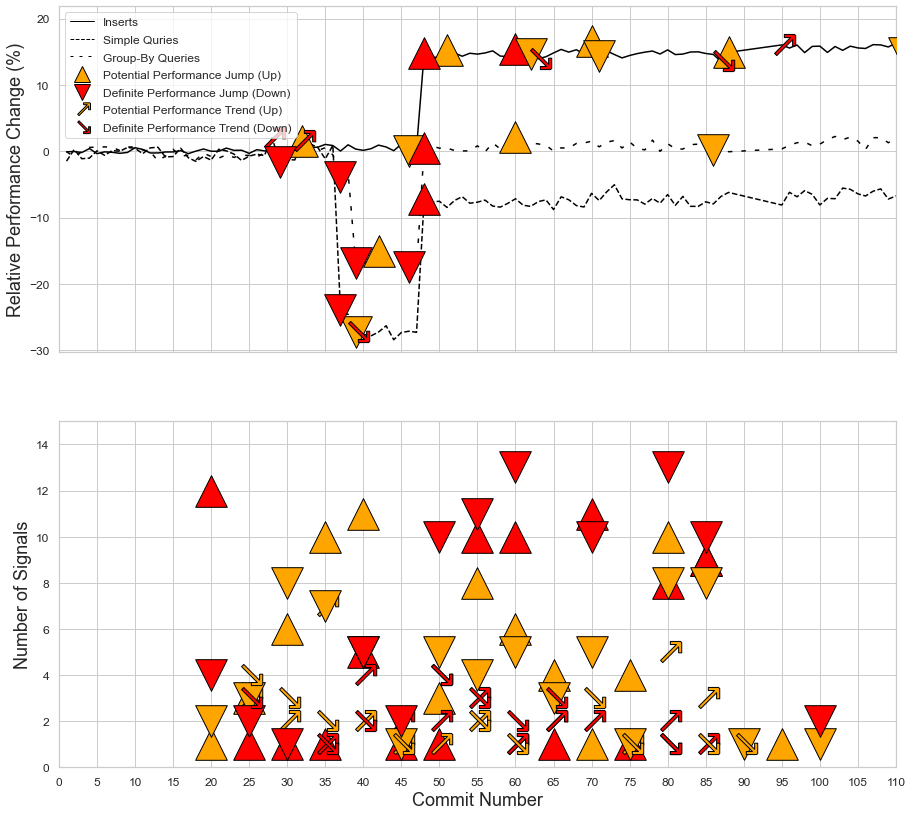

In [5]:
plt.clf()

df_changesAll = pd.read_csv(microAllSummary, sep=";")
result = []
#Translate Relevance to number of signals
currcommit = -1
lastCommit = -1
potUp = 0
defUp = 0
potDown = 0
defDown = 0
potTrendUp = 0
defTrendUp = 0
potTrendDown = 0
defTrendDown = 0
for index, row in df_changesAll.iterrows():
    if row["jump"] != "" or row["trend"] != "":
        if row["commit"] != currcommit:
            lastCommit = currcommit
            currcommit = row["commit"]
            # FLush results for current commit
            if potUp > 0:
                result.append({
                    "commit":lastCommit,
                    "jump": "potential up",
                    "relevance": potUp,
                    "trend": None})
                potUp = 0
            if potDown > 0:
                result.append({
                    "commit":lastCommit,
                    "jump": "potential down",
                    "relevance": potDown,
                    "trend": None})
                potDown = 0
            if defUp > 0:
                result.append({
                    "commit":lastCommit,
                    "jump": "definite up",
                    "relevance": defUp,
                    "trend": None})
                defUp = 0
            if defDown > 0:
                result.append({
                    "commit":lastCommit,
                    "jump": "definite down",
                    "relevance": defDown,
                    "trend": None})
                defDown = 0
            if potTrendUp > 0:
                result.append({
                    "commit":lastCommit,
                    "jump": None,
                    "relevance": potTrendUp,
                    "trend": "potential up"})
                potTrendUp = 0
            if potTrendDown > 0:
                result.append({
                    "commit":lastCommit,
                    "jump": None,
                    "relevance": potTrendDown,
                    "trend": "potential down"})
                potTrendDown = 0
            if defTrendUp > 0:
                result.append({
                    "commit":lastCommit,
                    "jump": None,
                    "relevance": defTrendUp,
                    "trend": "definite up"})
                defTrendUp = 0
            if defTrendDown > 0:
                    result.append({
                        "commit":lastCommit,
                        "jump": None,
                        "relevance": defTrendDown,
                        "trend": "definite down"})
                    defTrendDown = 0

        if row["jump"] == "definite up":
            defUp += 1
        if row["jump"] == "potential up":
            potUp += 1
        if row["jump"] == "definite down":
            defDown += 1
        if row["jump"] == "potential down":
            potDown += 1
        if row["trend"] == "definite up":
            defTrendUp += 1
        if row["trend"] == "potential up":
            potTrendUp += 1
        if row["trend"] == "definite down":
            defTrendDown += 1
        if row["trend"] == "potential down":
            potTrendDown += 1

#Flush results of the last row
if potUp > 0:
    result.append({
        "commit":currcommit,
        "jump": "potential up",
        "relevance": potUp,
        "trend": None})
    potUp = 0
if potDown > 0:
    result.append({
        "commit":currcommit,
        "jump": "potential down",
        "relevance": potDown,
        "trend": None})
    potDown = 0
if defUp > 0:
    result.append({
        "commit":currcommit,
        "jump": "definite up",
        "relevance": defUp,
        "trend": None})
    defUp = 0
if defDown > 0:
    result.append({
        "commit":currcommit,
        "jump": "definite down",
        "relevance": defDown,
        "trend": None})
    defDown = 0
if potTrendUp > 0:
    result.append({
        "commit":currcommit,
        "jump": None,
        "relevance": potTrendUp,
        "trend": "potential up"})
    potTrendUp = 0
if potTrendDown > 0:
    result.append({
        "commit":currcommit,
        "jump": None,
        "relevance": potTrendDown,
        "trend": "potential down"})
    potTrendDown = 0
if defTrendUp > 0:
    result.append({
        "commit":currcommit,
        "jump": None,
        "relevance": defTrendUp,
        "trend": "definite up"})
    defTrendUp = 0
if defTrendDown > 0:
        result.append({
            "commit":currcommit,
            "jump": None,
            "relevance": defTrendDown,
            "trend": "definite down"})
        defTrendDown = 0

df_changesAll = DataFrame(result)



plot, axes = plt.subplots(2,1,figsize=(15,14), sharex=True)
axes[0].set_ylim([min, max])
axes[0].set_xlim([0, 110])
axes[0].set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110])
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)

i=0
for type in df_values.type.unique():
    print(f"Plotting type {type}")

    measurements = df_values.loc[(df_values['type'].str.startswith(type, na=False))]

    print(f"Style is {linestyles[i]}")
    #Plot Median line
    sns.lineplot(ax=axes[0], data=measurements, x="commit", y="Median", color="black", linestyle=linestyles[i])
    i += 1

    #Plot detected ups and downs as well
    ups = measurements.loc[(measurements['jump'].astype(str).str.startswith("potential up", na=False))]
    plot = sns.regplot(ax=axes[0], data=ups,x="commit", y="Median", marker="^", fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})
    ups = measurements.loc[(measurements['jump'].astype(str).str.startswith("definite up", na=False))]
    plot = sns.regplot(ax=axes[0], data=ups,x="commit", y="Median", marker="^", fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})

    ups = measurements.loc[(measurements['trend'].astype(str).str.startswith("potential up", na=False))]
    plot = sns.regplot(ax=axes[0], data=ups,x="commit", y="Median", marker=uptrendMarker, fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})
    ups = measurements.loc[(measurements['trend'].astype(str).str.startswith("definite up", na=False))]
    plot = sns.regplot(ax=axes[0], data=ups,x="commit", y="Median", marker=uptrendMarker, fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})

    downs = measurements.loc[(measurements['jump'].astype(str).str.startswith("potential down", na=False))]
    plot = sns.regplot(ax=axes[0], data=downs,x="commit", y="Median", marker="v", fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})
    downs = measurements.loc[(measurements['jump'].astype(str).str.startswith("definite down", na=False))]
    plot = sns.regplot(ax=axes[0], data=downs,x="commit", y="Median", marker="v", fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})

    downs = measurements.loc[(measurements['trend'].astype(str).str.startswith("potential down", na=False))]
    plot = sns.regplot(ax=axes[0], data=downs,x="commit", y="Median", marker=downtrendMarker, fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})
    downs = measurements.loc[(measurements['trend'].astype(str).str.startswith("definite down", na=False))]
    plot = sns.regplot(ax=axes[0], data=downs,x="commit", y="Median", marker=downtrendMarker, fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})


legend_elements = [
    Line2D([0], [0], color='black', lw=1, label='Inserts', linestyle=linestyles[0]),
    Line2D([0], [0], color='black', lw=1, label='Simple Quries', linestyle=linestyles[2]),
    Line2D([0], [0], color='black', lw=1, label='Group-By Queries', linestyle=linestyles[1]),
    Line2D([0], [0], marker='^', color='w', label='Potential Performance Jump (Up)', markerfacecolor='orange', markeredgecolor=edgeColor, markersize=16),
    Line2D([0], [0], marker='v', color='w', label='Definite Performance Jump (Down)', markerfacecolor='red', markeredgecolor=edgeColor, markersize=16),
    Line2D([0], [0], marker=uptrendMarker, color='w', label='Potential Performance Trend (Up)', markerfacecolor='orange', markeredgecolor=edgeColor, markersize=16),
    Line2D([0], [0], marker=downtrendMarker, color='w', label='Definite Performance Trend (Down)', markerfacecolor='red', markeredgecolor=edgeColor, markersize=16)
]

plot.legend(fontsize=12, loc=2, title='', handles=legend_elements, labelspacing=0.6)


#Plot changes in 2nd plot
#PLot Up&Down Changes
ups = df_changesAll.loc[(df_changesAll['jump'].astype(str).str.startswith("potential up", na=False))]
plot = sns.regplot(ax=axes[1], data=ups,x="commit", y="relevance", marker="^", fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})
ups = df_changesAll.loc[(df_changesAll['jump'].astype(str).str.startswith("definite up", na=False))]
plot = sns.regplot(ax=axes[1], data=ups,x="commit", y="relevance", marker="^", fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})

ups = df_changesAll.loc[(df_changesAll['trend'].astype(str).str.startswith("potential up", na=False))]
plot = sns.regplot(ax=axes[1], data=ups,x="commit", y="relevance", marker=uptrendMarker, fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})
ups = df_changesAll.loc[(df_changesAll['trend'].astype(str).str.startswith("definite up", na=False))]
plot = sns.regplot(ax=axes[1], data=ups,x="commit", y="relevance", marker=uptrendMarker, fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})

downs = df_changesAll.loc[(df_changesAll['jump'].astype(str).str.startswith("potential down", na=False))]
plot = sns.regplot(ax=axes[1], data=downs,x="commit", y="relevance", marker="v", fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})
downs = df_changesAll.loc[(df_changesAll['jump'].astype(str).str.startswith("definite down", na=False))]
plot = sns.regplot(ax=axes[1], data=downs,x="commit", y="relevance", marker="v", fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":jumpSize, "zorder":3, 'edgecolor':edgeColor})

downs = df_changesAll.loc[(df_changesAll['trend'].astype(str).str.startswith("potential down", na=False))]
plot = sns.regplot(ax=axes[1], data=downs,x="commit", y="relevance", marker=downtrendMarker, fit_reg=False, scatter_kws={"color":"orange","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})
downs = df_changesAll.loc[(df_changesAll['trend'].astype(str).str.startswith("definite down", na=False))]
plot = sns.regplot(ax=axes[1], data=downs,x="commit", y="relevance", marker=downtrendMarker, fit_reg=False, scatter_kws={"color":"red","alpha":1,"s":trendSize, "zorder":3, 'edgecolor':edgeColor})



axes[0].set(ylim=(min, max))
axes[1].set(ylim=(0, 15))
#axes.legend(loc=4, fontsize="medium")
axes[1].set_xlabel('Commit Number', fontsize=18)
axes[0].set_ylabel('Relative Performance Change (%)', fontsize=18)
axes[1].set_ylabel('Number of Signals', fontsize=18)
#Accumulated Runtime of Overlapping Functions in Application Benchmark

plt.savefig(figure2,bbox_inches='tight')
